# Assignment 4

This assignment is about data processing and plotting.

## How to hand in

The assignment is expected to be published on GitHub, but the actual hand-in is on peergrade and should contain only a link to a MyBinder. The assignment should fit in a single Jupyter Notebook.

Remember her to use the link provided when first registering your notebook with mybinder (not the url taken from your browsers adress field). See the notebook 12-Assignments for more information.

## Use pandas dataframe with poverty data

Use this source: https://data.worldbank.org/indicator/SI.POV.DDAY and extract the csv file in jupyter notebook. With the help of Pandas' DataFrame do the following

1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years)
2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart
3. Show the development of absolute poverty in all the central american countries. Hand in:
    - A description of what graphical representation you think is best for this task
        - See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html
    - The actual graphical representation in a Jupyter Notebook
4. From the worldbank api, find one more interesting question you would like to ask. Hand in:
    - A description of why that question is interesting
    - A visualisation of the question in your Jupyter Notebook
        - See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html

In [1]:
import pandas as pd
import my_module
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# url with data
url = 'http://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv'
df = my_module.get_dataframe_from_url(url)
# setting collumn 'Country Name' as index
df.set_index('Country Name',inplace=True)

### 1 Create a line graph showing the development in poverty over time in both Argentina, Ivory coast, USA.

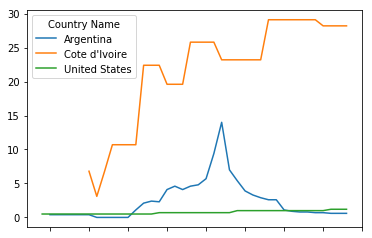

In [3]:
# .T transpose. swaps the axes
# .loc['1960':'2018',['Argentina','Cote d\'Ivoire','United States']] gets the rows labeled '1960' to '2018'
# from columns labeled 'Argentina','Cote d\'Ivoire' and 'United States'
# .ffill() fills values forward to account for nan's. needed to be plotted correctly
df.T.loc['1960':'2018',['Argentina','Cote d\'Ivoire','United States']].ffill().plot()

### 2 Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart.

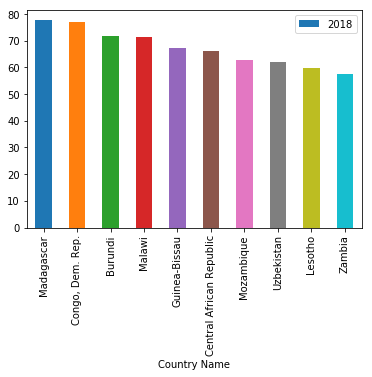

In [4]:
# looping through years with data
#for year in range(1979,2018):
year = '2018'
# finding the top 10 and making a bar plot
df.T.loc['1960':'2018',:].ffill().T.nlargest(10,str(year)).plot.bar(y=str(year))

### 3 Show the development of absolute poverty in all the central american countries.

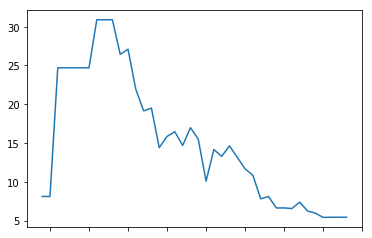

In [5]:
df.T.loc['1960':'2018',my_module.central_american_countries].mean(axis = 1, skipna = True).ffill().plot()

### 4 From the worldbank api, find one more interesting question you would like to ask.

In [6]:
# Africa
african_mean = df.loc[my_module.african_countries,"1960":"2018"].mean(axis = 0, skipna = True)

# Asia
asian_mean = df.loc[my_module.asian_countries,"1960":"2018"].mean(axis = 0, skipna = True)

# Australia and Oceania
oceanian_mean = df.loc[my_module.oceanian_countries,"1960":"2018"].mean(axis = 0, skipna = True)

# Central America and the Caribbean
central_american_caribbean_mean = df.loc[my_module.central_american_caribbean_countries,"1960":"2018"].mean(axis = 0, skipna = True)

# Europe
european_mean = df.loc[my_module.european_countries,"1960":"2018"].mean(axis = 0, skipna = True)

# Middle East
middle_eastern_mean = df.loc[my_module.middle_eastern_countries,"1960":"2018"].mean(axis = 0, skipna = True)

# North America
north_american_mean = df.loc[my_module.north_american_countries,"1960":"2018"].mean(axis = 0, skipna = True)

# South America
south_american_mean = df.loc[my_module.south_american_countries,"1960":"2018"].mean(axis = 0, skipna = True)

C:\Users\super\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


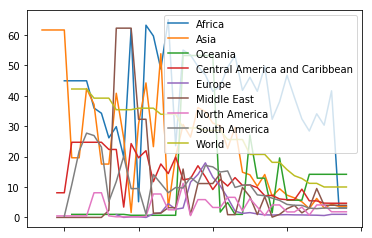

In [7]:
data_series = [african_mean,asian_mean,oceanian_mean,central_american_caribbean_mean,european_mean,
               middle_eastern_mean,north_american_mean,south_american_mean,df.loc['World','1960':'2018']]
columns = {0: 'Africa', 1: 'Asia',2:'Oceania',3:'Central America and Caribbean',4:'Europe',
           5:'Middle East',6:'North America',7:'South America'}
# collecting the series to a dataframe
collected_df = pd.concat(data_series,axis=1,sort=False).rename(index=str, columns=columns)
collected_df.ffill().plot()